In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data analysis 

In [2]:
solar_data=pd.read_csv(r"C:\Users\ABC\Documents\Dhrumil\ML & AI\SolarPrediction.csv")
solar_data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
solar_data.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [4]:
solar_data.shape

(32686, 11)

In [5]:
solar_data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [6]:
sd=solar_data.drop(['UNIXTime'],axis=1)
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [7]:
sd.dtypes


Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [9]:
#Converting the data type of the sunrise time and sunset time
sd['TimeSunRise']=pd.to_datetime(sd['TimeSunRise'],format='%H:%M:%S')
sd['TimeSunSet']=pd.to_datetime(sd['TimeSunSet'],format='%H:%M:%S')


In [10]:
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00


In [11]:
sd['Exposure time']=sd['TimeSunSet']-sd['TimeSunRise']
sd['Exposure time']=sd['Exposure time']/np.timedelta64(1,'m') #Exposure time in minutes 

In [12]:
sd.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Exposure time
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,720.0


In [13]:
#Cleaning the time sunrise and time sunset column
solar=sd.drop(['TimeSunRise','TimeSunSet'],axis=1)
solar.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,720.0
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,720.0
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,720.0
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,720.0
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,720.0


In [14]:
solar['Date']=pd.to_datetime(solar['Data']+''+solar['Time'])
solar.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [15]:
solar.dtypes

Data                              object
Time                              object
Radiation                        float64
Temperature                        int64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
Exposure time                    float64
Date                      datetime64[ns]
dtype: object

In [16]:
sr=solar.drop(['Time'],axis=1)
sr.head()

,Data,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
0,9/29/2016 12:00:00 AM,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
1,9/29/2016 12:00:00 AM,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2,9/29/2016 12:00:00 AM,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
3,9/29/2016 12:00:00 AM,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
4,9/29/2016 12:00:00 AM,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [17]:
sr['Data']=pd.to_datetime(sr['Data'])
sr.head()

,Data,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
0,2016-09-29,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
1,2016-09-29,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2,2016-09-29,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
3,2016-09-29,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
4,2016-09-29,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [18]:
sr=sr.set_index('Data')
sr.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time,Date
Data,,,,,,,,
2016-09-29,1.21,48,30.46,59,177.39,5.62,720.0,2016-09-29 23:55:26
2016-09-29,1.21,48,30.46,58,176.78,3.37,720.0,2016-09-29 23:50:23
2016-09-29,1.23,48,30.46,57,158.75,3.37,720.0,2016-09-29 23:45:26
2016-09-29,1.21,48,30.46,60,137.71,3.37,720.0,2016-09-29 23:40:21
2016-09-29,1.17,48,30.46,62,104.95,5.62,720.0,2016-09-29 23:35:24


In [19]:
sr2=sr.drop(['WindDirection(Degrees)','Speed','Exposure time','Date','Humidity'],axis=1)
sr2.head()
            

,Radiation,Temperature,Pressure
Data,,,
2016-09-29,1.21,48,30.46
2016-09-29,1.21,48,30.46
2016-09-29,1.23,48,30.46
2016-09-29,1.21,48,30.46
2016-09-29,1.17,48,30.46


In [20]:
sr.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Exposure time
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,690.550542
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,29.931225
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,656.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,662.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,684.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,715.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,751.000000


In [21]:
#Outliers prediction
sr.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Exposure time             0
Date                      0
dtype: int64

<AxesSubplot:xlabel='Pressure'>

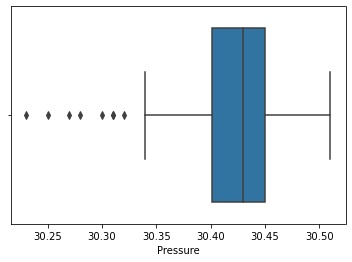

In [34]:
sns.boxplot(x='Pressure',data=d1)

In [27]:
print(sr['Radiation'].quantile(0.95))

907.275


In [28]:
from collections import OrderedDict
l1=list(sr2.index)
l1_d=list(OrderedDict.fromkeys(l1))
print(l1_d)
#removing duplicates from the list 

[Timestamp('2016-09-29 00:00:00'), Timestamp('2016-09-28 00:00:00'), Timestamp('2016-09-27 00:00:00'), Timestamp('2016-09-26 00:00:00'), Timestamp('2016-09-25 00:00:00'), Timestamp('2016-09-24 00:00:00'), Timestamp('2016-09-23 00:00:00'), Timestamp('2016-09-22 00:00:00'), Timestamp('2016-09-21 00:00:00'), Timestamp('2016-09-20 00:00:00'), Timestamp('2016-09-19 00:00:00'), Timestamp('2016-09-18 00:00:00'), Timestamp('2016-09-17 00:00:00'), Timestamp('2016-09-16 00:00:00'), Timestamp('2016-09-15 00:00:00'), Timestamp('2016-09-14 00:00:00'), Timestamp('2016-09-13 00:00:00'), Timestamp('2016-09-12 00:00:00'), Timestamp('2016-09-11 00:00:00'), Timestamp('2016-09-10 00:00:00'), Timestamp('2016-09-09 00:00:00'), Timestamp('2016-09-08 00:00:00'), Timestamp('2016-09-07 00:00:00'), Timestamp('2016-09-06 00:00:00'), Timestamp('2016-09-05 00:00:00'), Timestamp('2016-09-04 00:00:00'), Timestamp('2016-09-03 00:00:00'), Timestamp('2016-09-02 00:00:00'), Timestamp('2016-09-01 00:00:00'), Timestamp('20

In [29]:
m=[]
for i in l1_d:
    l2=sr2.loc[i].median()
    m.append(l2)
print(m)

[Radiation       6.16
Temperature    51.00
Pressure       30.44
dtype: float64, Radiation       6.815
Temperature    53.000
Pressure       30.390
dtype: float64, Radiation       8.45
Temperature    52.00
Pressure       30.38
dtype: float64, Radiation       1.26
Temperature    49.00
Pressure       30.42
dtype: float64, Radiation      10.445
Temperature    51.000
Pressure       30.460
dtype: float64, Radiation       8.25
Temperature    54.00
Pressure       30.46
dtype: float64, Radiation       1.75
Temperature    54.00
Pressure       30.45
dtype: float64, Radiation       7.63
Temperature    54.00
Pressure       30.41
dtype: float64, Radiation       5.535
Temperature    51.000
Pressure       30.400
dtype: float64, Radiation       7.92
Temperature    50.00
Pressure       30.40
dtype: float64, Radiation      18.92
Temperature    56.00
Pressure       30.43
dtype: float64, Radiation       7.48
Temperature    53.00
Pressure       30.45
dtype: float64, Radiation       8.84
Temperature    54.00


In [30]:
d1=pd.DataFrame(m)
d1.tail()

,Radiation,Temperature,Pressure
113,5.71,45.0,30.34
114,1.25,45.0,30.35
115,1.25,45.0,30.32
116,1.24,45.0,30.37
117,1.23,45.0,30.41


In [31]:
d1.describe()

,Radiation,Temperature,Pressure
count,118.000000,118.000000,118.000000
mean,5.808305,49.783898,30.421822
std,21.801788,3.206883,0.049844
min,1.225000,44.000000,30.230000
25%,1.260000,47.250000,30.401250
50%,1.315000,50.000000,30.430000
75%,5.277500,52.000000,30.450000
max,234.800000,56.000000,30.510000


In [32]:
d1['Date_modified']=l1_d
d1.head()

,Radiation,Temperature,Pressure,Date_modified
0,6.160,51.0,30.44,2016-09-29
1,6.815,53.0,30.39,2016-09-28
2,8.450,52.0,30.38,2016-09-27
3,1.260,49.0,30.42,2016-09-26
4,10.445,51.0,30.46,2016-09-25


In [33]:
d1=d1.set_index('Date_modified')
d1.head()

,Radiation,Temperature,Pressure
Date_modified,,,
2016-09-29,6.160,51.0,30.44
2016-09-28,6.815,53.0,30.39
2016-09-27,8.450,52.0,30.38
2016-09-26,1.260,49.0,30.42
2016-09-25,10.445,51.0,30.46


In [35]:
Q1=d1['Radiation'].quantile(0.25)
Q3=d1['Radiation'].quantile(0.75)

In [36]:
IQR=Q3-Q1
IQR

4.0175

In [37]:
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR


In [38]:
low_lim

-4.76625

In [39]:
# To know the counts of the outlier values 
outlier=[]
for x in d1['Radiation']:
    if (x>upper_lim) or (x<low_lim):
        outlier.append(x)
print(len(outlier))

10


In [40]:
d1=d1[(d1.Radiation<upper_lim)]
d1.shape

(108, 3)

<AxesSubplot:xlabel='Radiation'>

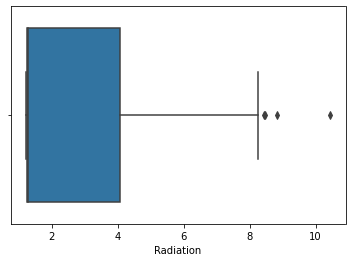

In [41]:
sns.boxplot(x='Radiation',data=d1)

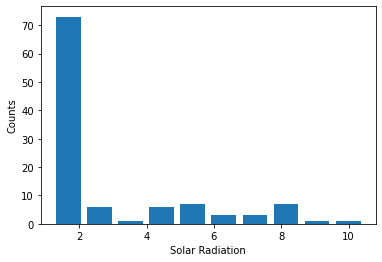

In [42]:
plt.hist(d1.Radiation,bins=10,rwidth=0.8)
plt.xlabel('Solar Radiation')
plt.ylabel('Counts')
plt.show()

<AxesSubplot:xlabel='Radiation'>

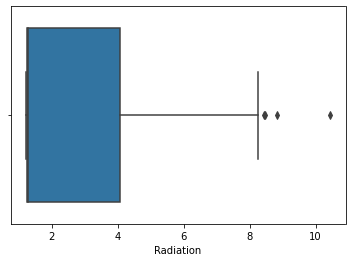

In [43]:
sns.boxplot(x='Radiation',data=d1)

In [44]:
corelation=d1.corr()

<AxesSubplot:>

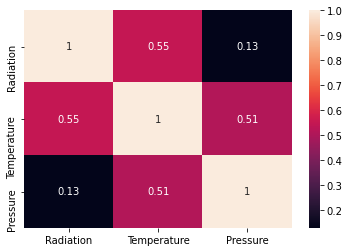

In [45]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [46]:
# Radiation has more corelation with the temperature 

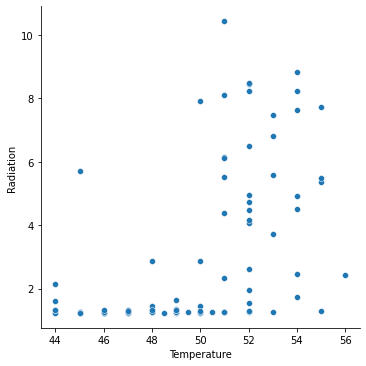

In [47]:
sns.relplot(x='Temperature',y='Radiation',data=d1)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radiation', ylabel='Density'>

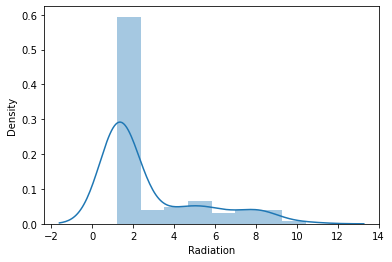

In [48]:
sns.distplot(d1['Radiation'])

In [49]:
import scipy 
from scipy.stats import spearmanr

In [50]:
spearmanr_coefficient,p_value=spearmanr(d1['Radiation'],d1['Temperature'])# Since the data is not normally distributed 
print(spearmanr_coefficient)

0.659380955026571


In [51]:
#According to spearmanr corelation coefficient temperature, pressure and exposure time is corelated with radiation

# Model Creation

<AxesSubplot:xlabel='Date_modified', ylabel='Radiation'>

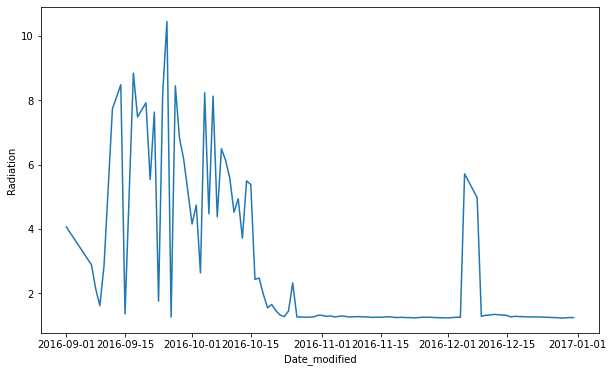

In [52]:
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
sns.lineplot(data=d1,x='Date_modified',y='Radiation')

In [53]:
rolmean=d1.rolling(window=12).mean()
rolstd=d1.rolling(window=12).std()
print(rolmean,rolstd)

               Radiation  Temperature   Pressure
Date_modified                                   
2016-09-29           NaN          NaN        NaN
2016-09-28           NaN          NaN        NaN
2016-09-27           NaN          NaN        NaN
2016-09-26           NaN          NaN        NaN
2016-09-25           NaN          NaN        NaN
...                  ...          ...        ...
2016-12-05      1.975000    47.333333  30.330000
2016-12-04      1.973333    47.250000  30.327500
2016-12-03      1.970833    47.083333  30.331667
2016-12-02      1.969167    46.833333  30.343333
2016-12-01      1.962500    46.750000  30.356667

[108 rows x 3 columns]                Radiation  Temperature  Pressure
Date_modified                                  
2016-09-29           NaN          NaN       NaN
2016-09-28           NaN          NaN       NaN
2016-09-27           NaN          NaN       NaN
2016-09-26           NaN          NaN       NaN
2016-09-25           NaN          NaN       NaN
...

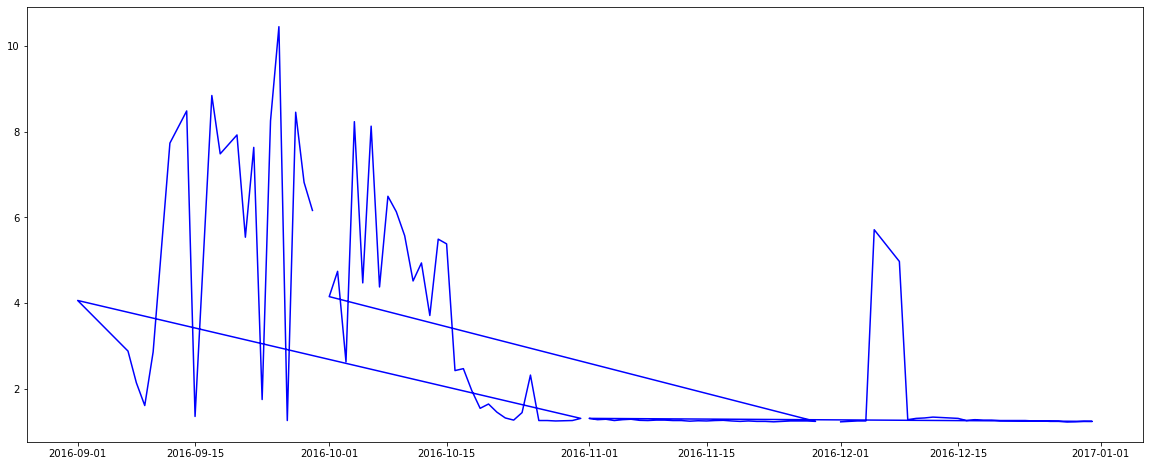

In [54]:
rcParams['figure.figsize']=20,8
plt.plot(d1['Radiation'],color='blue')
#plt.plot(rolmean,color='black',label='Rolling mean')
#plt.plot(rolstd,color='red',label='Rolling std')
plt.show(block=False)

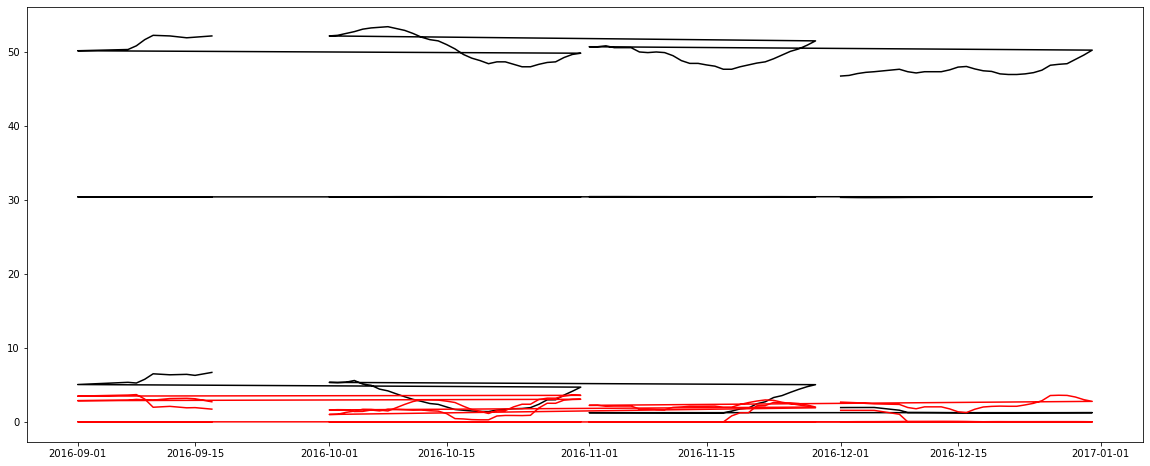

In [55]:
plt.plot(rolmean,color='black',label='Rolling mean')
plt.plot(rolstd,color='red',label='Rolling std')

In [56]:
#Perform Dicky fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of dicky fuller test:')
dftest=adfuller(d1['Pressure'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of dicky fuller test:
Test statistic                  -4.859871
p-value                          0.000042
Lags Used                        1.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [57]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='Red',label='rolling mean')
    std=plt.plot(movingSTD,color='black',label='rolling std')
    plt.title('Rolling mean & standard deviation')
    plt.show()
    
    
    print('Results of dicky fuller test:')
    dftest=adfuller(d1['Radiation'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    

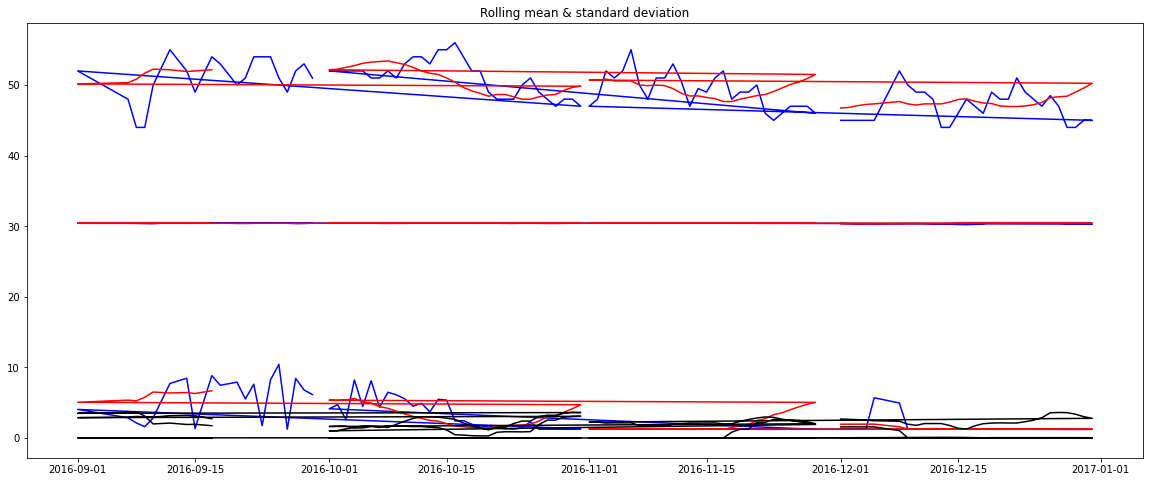

Results of dicky fuller test:
Test statistic                  -2.656509
p-value                          0.081871
Lags Used                        2.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [58]:
test_stationarity(d1)

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [60]:
for i in range(len(d1.columns)):
    result=adfuller(d1[d1.columns[i]])
    
    if result[i]>0.05:
        print('{}- the series is not stationery'.format(d1.columns[i]))
    else:
        print('{}- the series is stationery'.format(d1.columns[i]))

Radiation- the series is stationery
Temperature- the series is not stationery
Pressure- the series is not stationery


In [61]:
max_lags=8
y='Radiation'

In [62]:
for i in range(len(d1.columns)-1):
    results=grangercausalitytests(d1[[y,d1.columns[i+1]]],max_lags,verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('Column-{}:P-Values-{}'.format(d1.columns[i+1],p_values))

Column-Temperature:P-Values-[0.0401, 0.2647, 0.041, 0.1174, 0.0949, 0.1129, 0.1885, 0.161]
Column-Pressure:P-Values-[0.6643, 0.8975, 0.5913, 0.812, 0.9695, 0.8571, 0.981, 0.9789]


In [63]:
from statsmodels.tsa.api import VAR

In [64]:
sr_train=d1[0:-12]
sr_test=d1[-12:]

In [65]:
sr_train.shape

(96, 3)

In [66]:
sr_test.shape

(12, 3)

In [67]:
model=VAR(sr_train)
for i in range(20):
    results=model.fit(i+1)
    print('Order=',i+1)
    print('AIC:',results.aic)
    print('BIC:',results.bic)

Order= 1
AIC: -4.090063621992516
BIC: -3.7674686462113947
Order= 2
AIC: -4.440380056292917
BIC: -3.87219717940281
Order= 3
AIC: -4.574589549614497
BIC: -3.757621971177963
Order= 4
AIC: -4.534859357263507
BIC: -3.4658402865579347
Order= 5
AIC: -4.444589166729296
BIC: -3.12017975669843
Order= 6
AIC: -4.387333472599818
BIC: -2.80412068139065
Order= 7
AIC: -4.521602992867367
BIC: -2.6760973703693756
Order= 8
AIC: -4.5327177947086295
BIC: -2.421351191460158
Order= 9
AIC: -4.592594963411054
BIC: -2.211718159192835
Order= 10
AIC: -4.6382810797260685
BIC: -1.9841613291263451
Order= 11
AIC: -4.474709655002243
BIC: -1.5435281472138627
Order= 12
AIC: -4.5190360190239485
BIC: -1.3068852491238552
Order= 13
AIC: -4.681037545590325
BIC: -1.183918594559099
Order= 14
AIC: -4.578632142050397
BIC: -0.7924518628176083
Order= 15
AIC: -4.541884910810441
BIC: -0.46245301766480384
Order= 16
AIC: -4.789571057048594
BIC: -0.41259711583533765
Order= 17
AIC: -5.018607525769239
BIC: -0.3396978424166388
Order= 18
A

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [68]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,-3.376,-3.284,0.03417,-3.340
1,-5.271,-4.903,0.005139,-5.124
2,-5.814*,-5.170*,0.002990*,-5.557*
3,-5.659,-4.739,0.003502,-5.291
4,-5.564,-4.368,0.003873,-5.086
5,-5.406,-3.934,0.004577,-4.818
6,-5.382,-3.634,0.004749,-4.684
7,-5.295,-3.271,0.005279,-4.486
8,-5.075,-2.775,0.006744,-4.156
9,-4.917,-2.341,0.008162,-3.888


In [69]:
results=model.fit(2)

In [70]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, Dec, 2021
Time:                     14:52:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.87220
Nobs:                     94.0000    HQIC:                  -4.21088
Log likelihood:          -170.443    FPE:                  0.0118012
AIC:                     -4.44038    Det(Omega_mle):      0.00951364
--------------------------------------------------------------------
Results for equation Radiation
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                212.635644       183.038769            1.162           0.245
L1.Radiation           0.262003         0.106306            2.465           0.014
L1.Temperature         0.037425         0.107688    

In [71]:
lag_order=results.k_ar
print(lag_order)

2


In [72]:
forecast_input=results.forecast(sr_train.values[-lag_order:],steps=len(sr_test))

In [73]:
sr_forecast=pd.DataFrame(forecast_input,index=d1.index[-len(sr_test):],columns=d1.columns+'_forecast')
sr_forecast.describe()

,Radiation_forecast,Temperature_forecast,Pressure_forecast
count,12.000000,12.000000,12.000000
mean,2.719784,49.402253,30.429074
std,0.223732,0.995120,0.029136
min,2.503351,46.606143,30.350292
25%,2.590014,49.532497,30.424583
50%,2.612810,49.644158,30.430535
75%,2.831051,49.827962,30.437819
max,3.164093,50.357836,30.469968


In [74]:
r1=sr_forecast.loc[:,['Radiation_forecast']]

In [75]:
predictions=sr_forecast['Radiation_forecast']
predictions.head()

Date_modified
2016-12-14    2.893023
2016-12-13    3.108725
2016-12-12    3.164093
2016-12-11    2.810393
2016-12-10    2.610270
Name: Radiation_forecast, dtype: float64

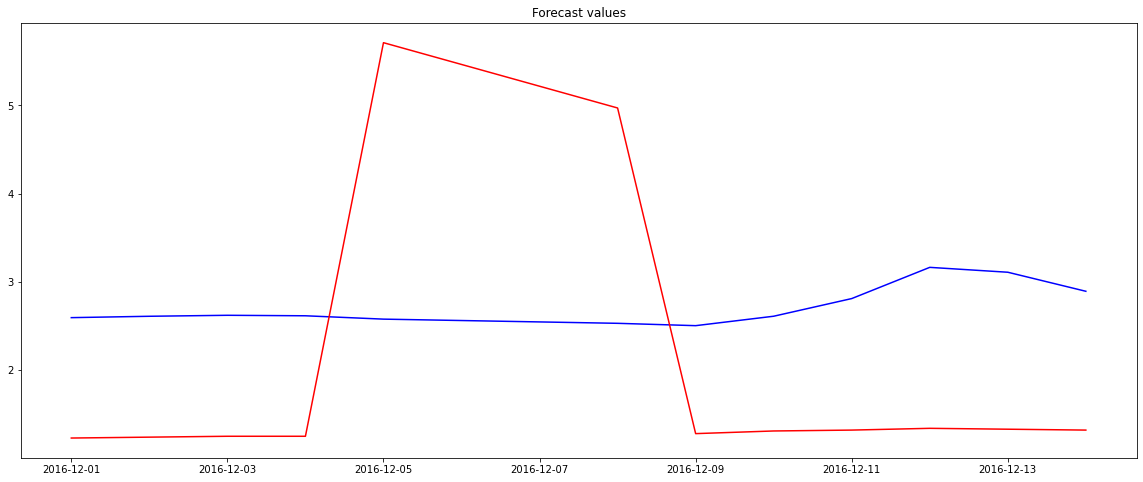

In [76]:
plt.plot(r1,color='blue',label='Forecasted radiation values')
plt.plot(sr_test.loc[:,['Radiation']],label='test data',color='red')
plt.title('Forecast values')
plt.show()

In [77]:
import sklearn.metrics
import math
mse=sklearn.metrics.mean_squared_error(sr_test.loc[:,['Radiation']],predictions)
rmse=math.sqrt(mse)
print(rmse)



1.7706463677488178


In [78]:
d1.head()

,Radiation,Temperature,Pressure
Date_modified,,,
2016-09-29,6.160,51.0,30.44
2016-09-28,6.815,53.0,30.39
2016-09-27,8.450,52.0,30.38
2016-09-26,1.260,49.0,30.42
2016-09-25,10.445,51.0,30.46


In [79]:
model = VAR(sr_train[1:])

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [80]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -3.372      -3.279     0.03434      -3.334
1       -5.382      -5.011    0.004599      -5.234
2      -5.921*     -5.272*   0.002687*     -5.662*
3       -5.724      -4.797    0.003282      -5.354
4       -5.660      -4.455    0.003518      -5.179
5       -5.503      -4.020    0.004158      -4.911
6       -5.379      -3.618    0.004771      -4.676
7       -5.276      -3.236    0.005395      -4.461
8       -5.070      -2.753    0.006801      -4.145
9       -4.881      -2.285    0.008508      -3.844
10      -4.864      -1.991    0.009035      -3.717
11      -4.686      -1.534     0.01142      -3.427
12      -4.737      -1.307     0.01163      -3.367
13      -4.897      -1.190     0.01079      -3.417
14      -4.811     -0.8247     0.01309      -3.219
15      -4.756     -0.4918     0.01576      -3.053
16      -4.912     -0.3698     

In [81]:
from statsmodels.tsa.statespace.varmax import VARMAX
endog=sr_train.drop(['Pressure'],axis=1)
exog=sr_train.drop(['Radiation','Temperature'],axis=1)
var_model = VARMAX(endog,exog=exog,order=(1,1))
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


                                Statespace Model Results                                
Dep. Variable:     ['Radiation', 'Temperature']   No. Observations:                   96
Model:                              VARMAX(1,1)   Log Likelihood                -373.317
                                    + intercept   AIC                            776.634
Date:                          Fri, 24 Dec 2021   BIC                            815.099
Time:                                  14:52:46   HQIC                           792.182
Sample:                                       0                                         
                                           - 96                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):             2.03, 0.26   Jarque-Bera (JB):          20.77, 1.89
Prob(Q):                        0.15, 0.61   Prob(JB):                   0.00, 0.39
Heteroskedasticity (H):        

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
yhat = fitted_model.forecast(steps=len(sr_test),exog=sr_test['Pressure'])
df=pd.DataFrame(yhat)
df

C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\ABC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


,Radiation,Temperature
96,1.632809,46.299477
97,1.607871,46.895785
98,1.571071,47.630741
99,1.552257,48.312046
100,1.588343,48.669411
101,1.670502,48.713852
102,1.762487,48.652841
103,1.897005,48.245631
104,1.961121,48.234069
105,2.061081,47.940235


In [87]:
df.columns=['Radiation_predicted','Temperature_predicted']
df

,Radiation_predicted,Temperature_predicted
96,1.632809,46.299477
97,1.607871,46.895785
98,1.571071,47.630741
99,1.552257,48.312046
100,1.588343,48.669411
101,1.670502,48.713852
102,1.762487,48.652841
103,1.897005,48.245631
104,1.961121,48.234069
105,2.061081,47.940235


In [88]:
l2=list(sr_test.index)
df['Date_m']=l2
df=df.set_index('Date_m')
df

,Radiation_predicted,Temperature_predicted
Date_m,,
2016-12-14,1.632809,46.299477
2016-12-13,1.607871,46.895785
2016-12-12,1.571071,47.630741
2016-12-11,1.552257,48.312046
2016-12-10,1.588343,48.669411
2016-12-09,1.670502,48.713852
2016-12-08,1.762487,48.652841
2016-12-05,1.897005,48.245631
2016-12-04,1.961121,48.234069


In [89]:
test_vs_pred=pd.concat([sr_test.drop('Pressure',axis=1),df],axis=1)

<AxesSubplot:>

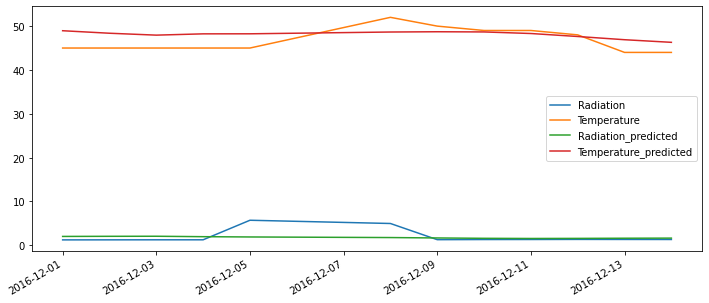

In [90]:
test_vs_pred.plot(figsize=(12,5))

In [100]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_radiation=math.sqrt(mean_squared_error(df['Radiation_predicted'],sr_test['Radiation']))
print('Mean value of Radiation is : {}. Root Mean Squared Error is :{}'.format(mean(sr_test['Radiation']),rmse_radiation))

Mean value of Radiation is : 1.9625000000000001. Root Mean Squared Error is :1.521368906482173
